In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
# Functions:

from numpy import sin, cos
from numpy import exp
from numpy import pi
from numpy import sqrt
from numpy import e
from numpy import absolute

def ros2(x1, x2): 
    return 100*(x2-x1**2)**2+(x1-1)**2

def easom(x, y):
    return -cos(x) * cos(y) * exp(-((x - pi)**2 + (y - pi)**2))

def ackley(x, y):
    return -20.0 * exp(-0.2 * sqrt(0.5 * (x**2 + y**2))) - exp(0.5 * (cos(2 * pi * x) + cos(2 * pi * y))) + e + 20

def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 -7)**2

def holder(x, y):
    return -absolute(sin(x) * cos(y) * exp(absolute(1 - (sqrt(x**2 + y**2)/pi))))



In [3]:
# TODO:

def get_path_by_func_name(funcname):
    pass
    

def get_gen_by_func_alg_name():
    pass

# ----

BASEPATH = "./results/generations/dmlshade/"

def load_gen(funcname, genid):
    pop = pd.read_csv(BASEPATH + funcname +"/pop-g" + str(genid) + ".csv", sep=";")
    return pop

def load_patt(funcname, genid):
    patt = pd.read_csv(BASEPATH + funcname + "/patterns-g" + str(genid) + ".csv", sep=";")
    return patt

def load_elite(funcname, genid):
    elite = pd.read_csv(BASEPATH + funcname + "/elite-g" + str(genid) + ".csv", sep=";")
    return elite

def load_clusters(funcname, genid):
    clusters = pd.read_csv(BASEPATH + funcname + "/clusters-g" + str(genid) + ".csv", sep=";")
    return clusters

def load_centroids(funcname, genid):
    centroids = pd.read_csv(BASEPATH + funcname + "/centroids-g" + str(genid) + ".csv", sep=";")
    return centroids

def load_dm_generations(funcname, max_gen):
    generations = {}
    patterns = {}
    elites = {}
    clusters = {}
    centroids = {}
    
    for i in range(1, max_gen+1):
        gen = load_gen(funcname, i) 
        generations[str(i)] = gen
        
        patt = load_patt(funcname, i)
        patterns[str(i)] = patt

        elite = load_elite(funcname, i)
        elites[str(i)] = elite

        cluster = load_clusters(funcname, i)
        clusters[str(i)] = cluster
        
        centroid = load_centroids(funcname, i)
        centroids[str(i)] = centroid
        
    return generations, patterns, elites, clusters, centroids

def load_generations(funcname, max_gen):
    generations = {}
    patterns = {}
    elites = {}
    clusters = {}

    for i in range(1, max_gen+1):
        gen = load_gen(funcname, i) 
        generations[str(i)] = gen
  
    return generations

In [4]:
generations = load_generations("ACKLEY2", 120)

In [5]:
generations, patterns, elite, clusters, centroids = load_dm_generations("ACKLEY2", 120)

In [62]:
def get_color(tag):
    if tag==1:
        return "red"
    elif tag==2:
        return "green"
    elif tag==3:
        return "blue"
    else:
        return "black"

def plot_function_landscape(f):
    x1 = np.linspace(-100, 100)
    x2 = np.linspace(-100, 100)
    X1, X2 = np.meshgrid(x1, x2)
    F = f(x1, x2)
    plt.contour(X1, X2, f(X1, X2))

def plot_patterns(patterns):
    plt.scatter(x=patterns['x1'],y=patterns['x2'], color="red", marker="*") 

def plot_elite(elite):
    plt.scatter(x=elite['x1'],y=elite['x2'], color="green")
    
def plot_clusters(cluster):
    colors = [get_color(t) for t in cluster['tag']]
    plt.scatter(x=cluster['x1'],y=cluster['x2'], color=colors) 
    
def plot_generation(gen, f):
    plot_function_landscape(f)
    plt.scatter(x=gen['x1'],y=gen['x2'],c='k', marker="x")
    
def plot_centroids(centroids):
    fig, ax = plt.subplots()
    
    colors = [get_color(t) for t in centroids['tag']]
    plt.scatter(x=centroids['x1'],y=centroids['x2'], color=colors)
    
    for centroid in centroids.itertuples():
        cir = plt.Circle((centroid.x1, centroid.x2), centroid.radius, color=get_color(centroid.tag),fill=False)
        ax.set_aspect('equal', adjustable='datalim')
        ax.add_patch(cir)

In [63]:
import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output

slider = widgets.IntSlider(min=1, max=100)
#slider.observe(on_change, names='value')

def plot_gen(v):
    #plt.figure().clear()
    gen = str(v)
    plot_centroids(centroids[gen])
    plot_generation(generations[gen], ackley)
    plot_clusters(clusters[gen])
    
text = widgets.IntText()

widgets.interact(plot_gen, v=slider)

widgets.jslink((slider, 'value'), (text, 'value'))

display(text)

interactive(children=(IntSlider(value=1, description='v', min=1), Output()), _dom_classes=('widget-interact',)…

IntText(value=0)

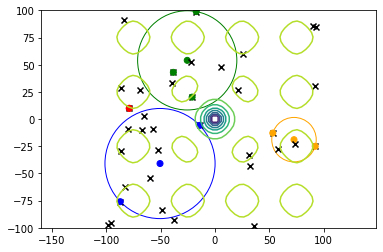

In [30]:
gen = "1"
plot_centroids(centroids[gen])
plot_generation(generations[gen], ackley)
plot_clusters(clusters[gen])

#plot_patterns(patterns[gen])
#plot_elite(elite[gen])



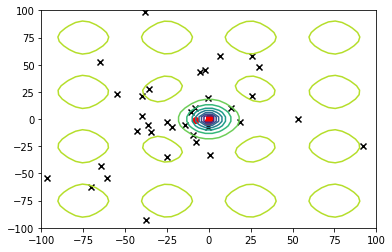

In [26]:
gen = "7"
plot_generation(generations[gen], ackley)

#plot_patterns(patterns[gen])
#plot_elite(elite[gen])

plot_clusters(clusters[gen])

In [65]:
centroids[gen]

,x1,x2,tag,radius
0,-0.781755,-0.376033,1,97.6645


In [67]:
import inspect

for row in centroids[gen].itertuples():
    print(row)

Pandas(Index=0, x1=-0.781755, x2=-0.376033, tag=1, radius=97.6645)
